There is a question in the second quiz (Week 2's first quiz) that shows a histogram and asks us where the mean falls in relation to the median. The histogram has a bit of a tilt to the left (negative skew) and the answer (according to the quiz) is that the mean falls to the left of the median. Here's a snapshot of the histogram:

<img src="quiztogram.png" width="300" height="300"/>

In this notebook, we'll look at the generalization that skew indicates where the mean lies relative to the median. That is, it's common to state that for a set of data skewed left (negative skew) the mean will be less than the median, and for a set of data skewed right (positive skew) the mean will be greater than the median.

We can approximate the original histogram by noting the height of each bar and where each bar is centered. For example, there is a bar of height 1 centered at 4.5, there is a bar of height 6 centered at 6.5, and so on. I made the following dataset to be consistent with the histogram: sdf2=(4.5,6.5,6.5,6.5,6.5,6.5,6.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,12.5,12.5,12.5,12.5,12.5,12.5,13.5)

I ran some simple Python and observed that while the skew was negative the mean was greater than the median. So, the broad generalization was immediately shown to be less than an absolute rule. I then generated hundreds of datasets, based on my initial set, where the new values were based on jitter about the initial values using random data from a uniform distribution. In about 15% of the cases, the mean was greater than the median (while the skew remained negative). 
                                        

We'll plot this dataset to show a histogram that is consistent with the original. Then, we'll look at the summary statistics including mean, median, and skew.

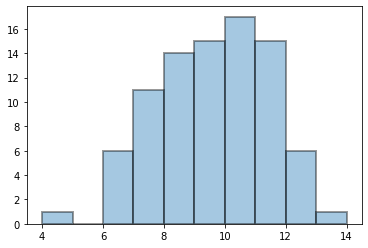


Mean = 9.62 Median= 9.50 Skew= -0.24


In [16]:
# We first need to import the packages that we will be using
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np
import scipy as sci
import pandas as pd
import random

sdf2=(4.5,6.5,6.5,6.5,6.5,6.5,6.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,12.5,12.5,12.5,12.5,12.5,12.5,13.5)
#set up histogram to mirror quick buckets
sns.distplot(sdf2, kde = False,bins = np.linspace(4.0, 14.0, 11),hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()
print('\nMean = {:3.2f} Median= {:3.2f} Skew= {:3.2f}'.format(np.mean(sdf2),np.median(sdf2),sci.stats.skew(sdf2)))


We note three things: 1) The histogram is consistent with the original histogram, 2) the skew is negative, and 3) the mean is greater than the median, not less.

Now, I am not surprised that the mean is greater than the median. I looked at the histogram in the quiz and figured the odds were good that I could duplicate it and get a mean greater than the median. It is well documented that the general idea that skew indicates the relative values of the mean and median is just that, a generalization. And it is relatively easy to generate exceptions, especially with chunky, discrete data. See the following for more information: http://jse.amstat.org/v13n2/vonhippel.html

It's clear that with discrete data we didn't have to try hard to have a case where negative skew occurs even though the mean is greater than the median. It's reasonable to ask if we could see the same relationship between the mean and median, still with negative skew, but with data that aren't so chunky. One approach is to take our initial dataset and jitter the results. For instance, we could simply make random, uniform data between -0.5 and +0.5 (the raw values have a minimum separation of 1 unit and the bars are 1 unit wide in the original histogram) and use the results as offsets for each of the initial data values. We certainly could make distributional assumptions about where values might fall in a given bar, but that's beyond the scope of this document and not essential to the analysis. In the next cell, we'll make a new set of data based on the original values but offset by random, uniform results.


Mean = 9.57 Median= 9.68 Skew= -0.37


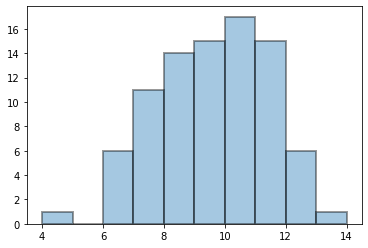

In [9]:
# We want the random package, and we'll set a seed for reproducibility
random.seed(123)

#there are 86 values in the original dataset
#make an array to store our values built from the orignal data and the offsets
sdf3=np.zeros(86) 
unifNumbers = [random.uniform(-0.5,0.5) for _ in range(86)]  #build a set of offsets

for i in range(0,86):
    sdf3[i]=sdf2[i]+unifNumbers[i]
print('\nMean = {:3.2f} Median= {:3.2f} Skew= {:3.2f}'.format(np.mean(sdf3),np.median(sdf3),sci.stats.skew(sdf3)))

#plot the results in  a histogram using the range and bars similar to the original plot
sns.distplot(sdf3, kde = False,bins = np.linspace(4.0, 14.0, 11),hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()

We see a histogram that is consistent with the original results. In this case, with the offsets to fill out each bar, the mean value is less than the median while the skew is negative. This result is consistent with the generalization about means, medians and skew. Next, we'll run the code above in a loop to generate not one such dataset but 100 cases. Will we see datasets (that are less chunky than our original dataset) that have negative skew but a mean greater than the median?

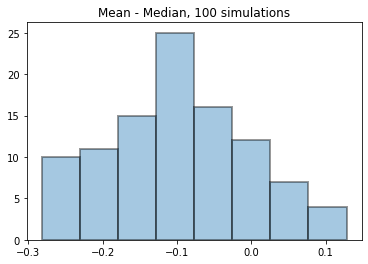

Positive numbers in the list:  18
Negative numbers in the list:  82


In [15]:
#set a seed for reproducibility
random.seed(123)

#initialize arrays for 100 simulations

delta=np.empty(100)  #delta stores the difference between the mean and median for each dataset
skew=np.empty(100)   #not really needed, just storing skew per dataset to spot check
sdf3=np.zeros(86)    #initialize our new dataset that will be the sum of the reference values and the uniformly distributed offsets
for j in range(0,100):
    unifNumbers = [random.uniform(-0.5,0.5) for _ in range(86)]
    for i in range(0,86):
        sdf3[i]=sdf2[i]+unifNumbers[i]
        delta[j] = np.mean(sdf3)-np.median(sdf3)
        skew[j] = sci.stats.skew(sdf3)
                                

#plot a histogram of the deltas; a positve delta indicates the mean is greater than the median            
sns.distplot(delta, kde = False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title('Mean - Median, 100 simulations')
plt.show()

#count the positve deltas
pos_count, neg_count = 0, 0
# iterating each number in list 
for num in delta: 
    # checking condition 
    if num > 0: 
        pos_count += 1
    else: 
        neg_count += 1     
print("Positive numbers in the list: ", pos_count) 
print("Negative numbers in the list: ", neg_count) 



The code could be much more elegant, I am sure, but we see that for this particular dataset 100 simulations that jitter the initial values yield 18 instances where the mean is greater than the median. I did not check the skew for each simulation but informally, every instance I checked (> 500 samples) had negative skew.

Should we expect that most such datasets will yield a mean less than the median? Yes. First, note that if we're adding an offset that ranges from -0.5 to 0.5 we are, overall, not changing the mean of the values. As long as our random values are at least roughly symmetric about zero we won't see much difference across the means. The key is the median. Our motivating histogram has, it appears, 86 results. This means that the median will be the average of the 43rd and 44th ranked values. The initial dataset I constructed (to recreate the histogram) has a median of 9.5, with 15 values -- the 33rd through 47th ranked values -- equal to 9.5. This means that when we jitter the results we now have 15 values that can range from 9.0 to 10.0. Eleven of these values (the new 33rd through 43rd ranked values) will be at or below the new median, and four of those values (the new 44th though 47th ranked values) will be at or above the new median. This suggests that with uniform offsets, we'd expect a median of somewhere between 9.5 and 10, with a reasonable estimate of something like 9.73. Given out inital mean of 9.62, it's clear that the median of our jittered dataset should, generally, be greater than the mean.

Conclusion

I used to work for a software company that produces a data collection and analysis platform for semiconductor companies. I've conducted training, done applications support, written newsletters, and recorded dozens of "how to" and "what does this statistic mean" training videos. For the last two years, I've tutored high school and college students in statistics. I have noticed that many people, when they are provided a simple generalization, latch on and take it as some sort of firm rule. And yeah, I'm generalizing here about the way people respond to a generalization, so this is just one angle out of many.

Still, the idea that skewness and the mean and median are neatly wrapped up in a tidy package is easy to reject. When I saw the histogram that motivated this notebook I thought, rather quickly, that if I duplicated it with discrete data I might likely see such a rejection. And I did, which motivated me to explore this subject using Python. Whenever possible, I'd recommend that histograms not be the exclusive plot of choice. Boxplots and normal probability plots have much to offer, especially with relatively small sample sizes.

I mentioned this topic on the class discussion board. The 'offical' response included a small example with an outlier. Yeah, outliers are easy. Give me a data value a few miles from the rest of the data and we know the story. Median doesn't really care, the mean goes berserk, and the magnitude of the skewness tends to roughly the square root of the sample size. Still, this is the case where we can have high confidence in the relationship between mean, median and skewness. Otherwise, we need to approach with at least a little bit of caution.